In [39]:
pwd

'/Users/christopherbaker_1/Desktop'

In [40]:
cd /Users/christopherbaker_1/desktop

/Users/christopherbaker_1/Desktop


In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st 
from scipy.stats import linregress

# Read dataset
mouse_data = pd.read_csv('mouse_metadata.csv')
results = pd.read_csv('study_results.csv')

# Study data files
mouse_metadata = 'data/Mouse_metadata.csv'
study_results = 'data/Study_results.csv'

# Merge datasets 
combined_df = pd.merge(results, mouse_data, how='left', on='Mouse ID')

# Drop duplicates 
drop_dup_df = combined_df.drop_duplicates(subset=['Mouse ID'])

drop_dup_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


# Check the number of mice 

In [42]:
print(combined_df['Mouse ID'].nunique())

249


## Get duplicate mice by ID # / Show Mouse ID & Timepoint

In [43]:
dup_mice_id = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()

dup_mice_id


array(['g989'], dtype=object)

## Get all data for duplicate mouse ID

In [44]:
dup_mice_df = combined_df.loc[combined_df['Mouse ID'] == 'g989', :]

dup_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


## Create clean dataframe by dropping duplicate mouse by ID

In [45]:
cleaned_df = combined_df[combined_df['Mouse ID'].isin(dup_mice_df['Mouse ID'])==False]

cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


## Check number of mice in clean dataframe

In [46]:
print(cleaned_df['Mouse ID'].nunique())

248


## Summary Statistics 

In [47]:
# Generate summary statistics table of mean, median, variance, standard deviation and SEM of tumor for each regimen
mean = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).mean()
median = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).median()
var = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).var()
std = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).std()
sem = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).sem()

# Create dataframe
sum_stats = pd.DataFrame({'Mean Tumor Volume':mean,
                         'Median Tumor Volume':median,
                         'Tumor Volume Variance':var,
                         'Tumor Volume Std. Dev':std,
                         'Tumor Volume Std. Err':sem})

sum_stats


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Advnaced method to generate summary statistics table, using 'Aggregation Method'

In [48]:
sum_agg = cleaned_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean','median', 'var', 'std', 'sem'])

sum_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [49]:
# Create group series
mice_cnt = cleaned_df['Drug Regimen'].value_counts()

Text(0, 0.5, '# of Observed Mouse Timepionts')

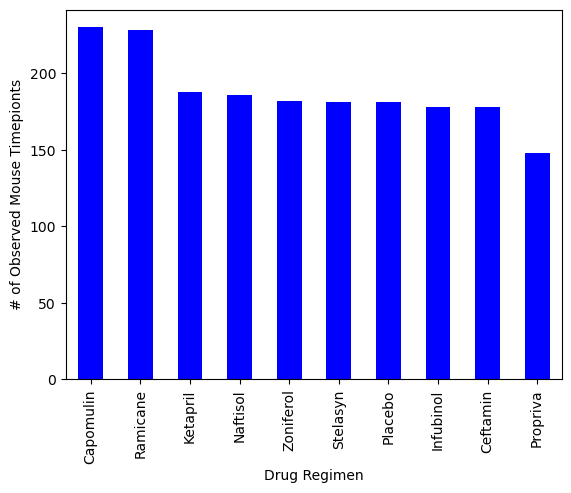

In [50]:
# Create bar plt (Mouse ID/Timepoints) using Pandas
pd_bar_plot = mice_cnt.plot.bar(color='b')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepionts')


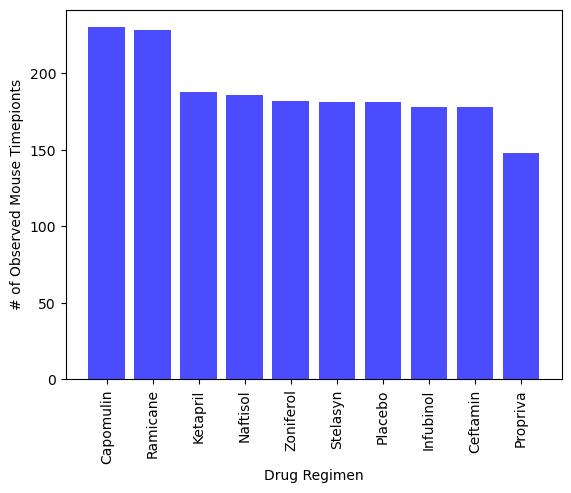

In [51]:
# Create bar plot (Mouse ID/Timepoints) using PyPlt
x_axis = mice_cnt.index.values
y_axis = mice_cnt.values

plt.bar(x_axis, y_axis, color='b', alpha=.7, align='center')

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepionts')
plt.xticks(rotation='vertical')

plt.show()

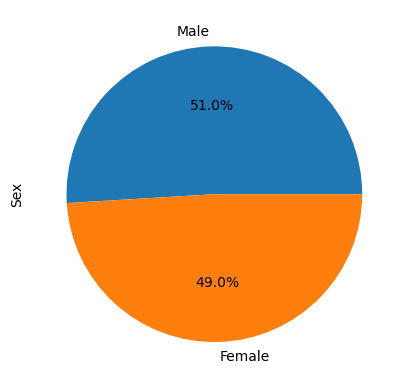

In [52]:
# Create pie plot (males vs females) using Pandas
genders = cleaned_df['Sex'].value_counts()
genders.plot.pie(autopct= '%1.1f%%')
plt.show()

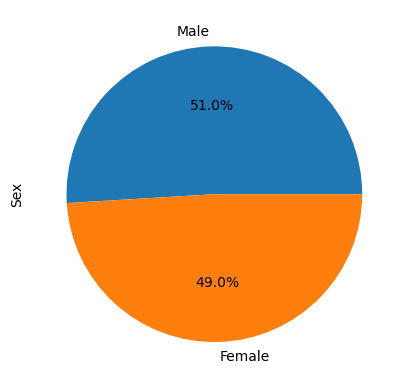

In [53]:
# Create pie plot (males vs females) using PyPlot
labels = ['Male', 'Female']
sizes = [49.7999197, 50.200803]
plot = genders.plot.pie(y='Total Count', autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots 

In [90]:
# Calculate final tumor volume 
capomulin_data = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin',:]
ramicane_data = clean_df.loc[clean_df['Drug Regimen'] == 'Ramicane',:]
infubinol_data = clean_df.loc[clean_df['Drug Regimen'] == 'Infubinol',:]
ceftamin_data = clean_df.loc[clean_df['Drug Regimen'] == 'ceftamin',:]


# Create group series
drug_names = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
drug_list = combined_df[combined_df['Drug Regimen'].isin(drug_names)]

# Get the last (greatest) timepoint for each mouse 
greatest_timepoint = drug_list.groupby(['Drug Regimen', 'Mouse ID']).agg(tumor_size=('Tumor Volume (mm3)', lambda x: x.iloc[-1]))

greatest_timepoint

tumor_size
Drug Regimen Mouse ID            
Capomulin    b128       38.982878
             b742       38.939633
             f966       30.485985
             g288       37.074024
             g316       40.159220
...                           ...
Ramicane     s508       30.276232
             u196       40.667713
             w678       43.166373
             y449       44.183451
             z578       30.638696

[100 rows x 1 columns]

In [91]:
# For Loop 
treatment_lst = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list 
tumor_volume_data = []

# Loop through list, calculate IQR and determine potential outliers
for treatment in treatment_lst:
    
    # Locate rows that contain mice on each drug and tumor volumes
    drug_tumor_volume = greatest_timepoint.loc[treatment, 'tumor_size']
    
    # Add subset 
    tumor_volume_data.append(drug_tumor_volume)
    
    # Calculate IQR 
    quartiles = drug_tumor_volume.quantile([.25,.5,.75])
    lower_quart = quartiles[.25]
    upper_quart = quartiles[.75]
    iqr = upper_quart - lower_quart
    
    # Determine outliers 
    lower_bounds = lower_quart - (1.5 * iqr)
    upper_bounds = upper_quart + (1.5 * iqr)
    outliers = drug_tumor_volume.loc[(drug_tumor_volume < lower_bounds) | (drug_tumor_volume > upper_bounds)]
    
    print(f"{treatment}'s potentional outliers: {outliers}")
          

Capomulin's potentional outliers: Series([], Name: tumor_size, dtype: float64)
Ramicane's potentional outliers: Series([], Name: tumor_size, dtype: float64)
Infubinol's potentional outliers: Mouse ID
c326    36.321346
Name: tumor_size, dtype: float64
Ceftamin's potentional outliers: Series([], Name: tumor_size, dtype: float64)


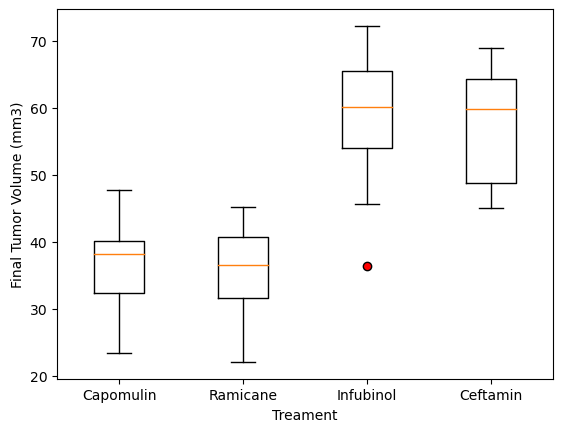

In [92]:
# Generate box plot 
fig1, ax1 = plt.subplots()
ax1.set_xlabel('Treament')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_volume_data, labels=treatment_lst, widths = .4, vert=True, flierprops=flierprops)

plt.show()

## Line and Scatter Plots 

Text(0, 0.5, 'Tumor Volume (mm3)')

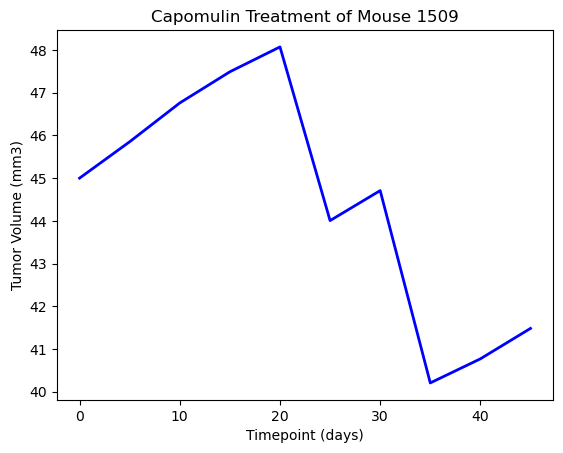

In [137]:
# Generate line plot
line_df = capomulin_data.loc[capomulin_data['Mouse ID'] == 'l509',:]

x_axis = line_df['Timepoint']
tumor_size = line_df['Tumor Volume (mm3)']

fig1, ax1 = plt.subplots()
plt.title('Capomulin Treatment of Mouse 1509')
plt.plot(x_axis, tumor_size, linewidth=2, color='blue', label='Fahreneit')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')


In [131]:
line_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)


/var/folders/j3/g2139v1n5dj2cp4ptq6wvghw0000gp/T/ipykernel_65728/3620236772.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_observed_tumor = capomulin_data.groupby(['Mouse ID']).mean()


Text(0, 0.5, 'Average Tumor Volume (mm3)')

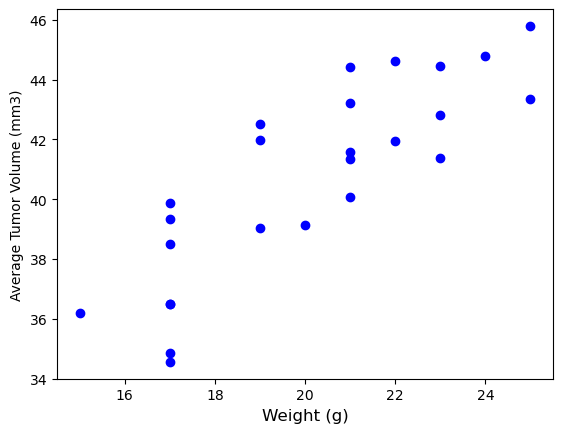

In [97]:
# Generate scatter plot 
fig1, ax1 = plt.subplots()
avg_observed_tumor = capomulin_data.groupby(['Mouse ID']).mean()
marker_size = 15
plt.scatter(avg_observed_tumor['Weight (g)'], avg_observed_tumor['Tumor Volume (mm3)'], color='blue')
plt.xlabel('Weight (g)', fontsize = 12)
plt.ylabel('Average Tumor Volume (mm3)')

## Correlation and Regression 

In [103]:
# Calculate correlation and regression 
corr_regr = st.pearsonr(avg_observed_tumor['Weight (g)'], avg_observed_tumor['Tumor Volume (mm3)'])

print(f'The correlation between mouse weight and average tumor is {round(corr_regr[0],2)}')

The correlation between mouse weight and average tumor is 0.84


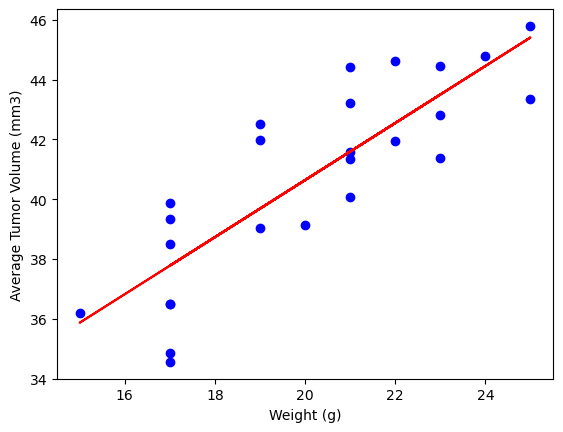

In [110]:
# Generate linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = linregress(avg_observed_tumor['Weight (g)'], avg_observed_tumor['Tumor Volume (mm3)'])
regression_value = avg_observed_tumor['Weight (g)'] * slope + intercept
line_equation = f'y = {round(slope,2)} x + {round(intercept, 2)}'

plt.scatter(avg_observed_tumor['Weight (g)'], avg_observed_tumor['Tumor Volume (mm3)'], color='b')
plt.plot(avg_observed_tumor['Weight (g)'], regression_value, color='red')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
